In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [19]:
data = {
    'Time_Spent_on_Site': [20, 5, 15, 35, 10, 25, 40, 7],
    'Pages_Viewed': [5, 1, 3, 8, 2, 6, 10, 1],
    'Is_Returning_Visitor': [1, 0, 1, 1, 0, 1, 1, 0],
    'Age': [25, 30, 22, 35, 27, 40, 29, 21],
    'Purchased': [1, 0, 1, 1, 0, 1, 1, 0]  # Target variable
}

df = pd.DataFrame(data)

In [20]:
X = df[['Time_Spent_on_Site', 'Pages_Viewed', 'Is_Returning_Visitor', 'Age']]
y = df['Purchased']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_pred = model.predict(X_test)

In [27]:
new_user = [[10, 4, 0, 28]]
prediction = model.predict(new_user)
prediction


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [28]:
probability = model.predict_proba(new_user)
probability[0][1]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


np.float64(0.06407492596929008)

In [26]:
print("\nPrediction for new user:", "Will Buy" if prediction[0] == 1 else "Won't Buy")
print("Probability:", probability[0][1])


Prediction for new user: Will Buy
Probability: 0.9999679039996335


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


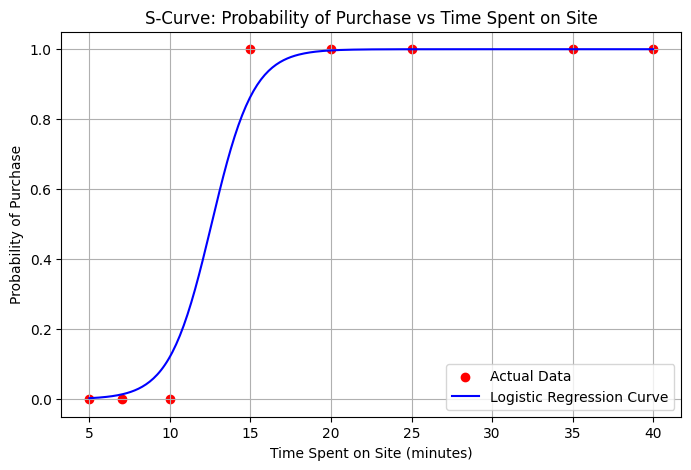

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# 1. Prepare the data for plotting (Time_Spent_on_Site vs Purchased)
X = df[['Time_Spent_on_Site']]
y = df['Purchased']

# 2. Fit logistic regression model
model = LogisticRegression()
model.fit(X, y)

# 3. Generate a range of values for time spent
x_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

# 4. Get predicted probabilities
y_probs = model.predict_proba(x_range)[:, 1]

# 5. Plot the sigmoid (S) curve
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(x_range, y_probs, color='blue', label='Logistic Regression Curve')
plt.title('S-Curve: Probability of Purchase vs Time Spent on Site')
plt.xlabel('Time Spent on Site (minutes)')
plt.ylabel('Probability of Purchase')
plt.legend()
plt.grid(True)
plt.show()
